In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
dataset = load_dataset("yelp_polarity")
train_texts = dataset["train"]["text"][:2000]
train_labels = dataset["train"]["label"][:2000]
test_texts = dataset["test"]["text"][:1000]
test_labels = dataset["test"]["label"][:1000]


README.md:   0%|          | 0.00/8.93k [00:00<?, ?B/s]

D:\Workspace\rb\sample-tracker-api\venv\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\PC\.cache\huggingface\hub\datasets--yelp_polarity. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/256M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/560000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/38000 [00:00<?, ? examples/s]

In [3]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)
train_seq = pad_sequences(tokenizer.texts_to_sequences(train_texts), maxlen=200)
test_seq = pad_sequences(tokenizer.texts_to_sequences(test_texts), maxlen=200)


In [4]:
# Model
model = Sequential([
    Embedding(10000, 16, input_length=200),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


D:\Workspace\rb\sample-tracker-api\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Train
history = model.fit(np.array(train_seq), np.array(train_labels), epochs=100, validation_data=(np.array(test_seq), np.array(test_labels)))


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5545 - loss: 0.6887 - val_accuracy: 0.5180 - val_loss: 0.6883
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5641 - loss: 0.6757 - val_accuracy: 0.5880 - val_loss: 0.6709
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6026 - loss: 0.6616 - val_accuracy: 0.5990 - val_loss: 0.6596
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6399 - loss: 0.6351 - val_accuracy: 0.6230 - val_loss: 0.6365
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6831 - loss: 0.6074 - val_accuracy: 0.6960 - val_loss: 0.5943
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7484 - loss: 0.5562 - val_accuracy: 0.6510 - val_loss: 0.5725
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8169 - loss: 0.4862 - val_accuracy: 0.7670 - val_loss: 0.5031
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8297 - loss: 0.4243 - val_accuracy: 0.8110 - 

In [6]:
# Evaluate
preds = (model.predict(test_seq) > 0.5).astype("int32")
report = classification_report(test_labels, preds, output_dict=False)
print(report)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       518
           1       0.85      0.78      0.82       482

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



In [7]:
# Save
model.save("sentiment_model_yelp.h5")


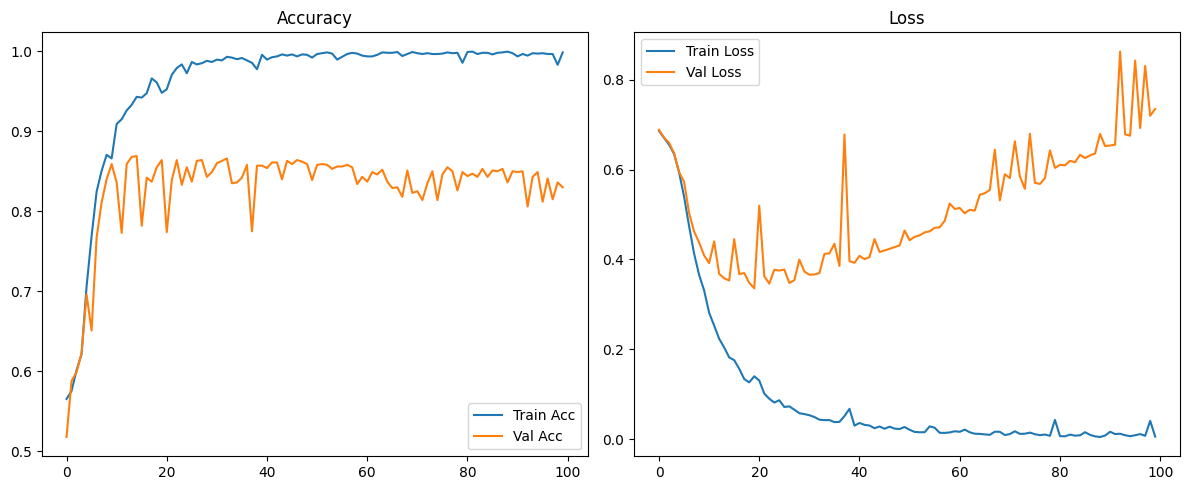

In [8]:
# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()
